# Correlations in Drake Passage

In [2]:
import os
import sys
sys.path.insert(1,'/glade/u/home/yhoussam/analysis/mom6_diagnostics')
from analysis_mom6 import *
import matplotlib.pyplot as plt
import cmocean
from cartopy import crs as ccrs
from tqdm import tqdm
import colorcet as cc
from collections import OrderedDict
import pandas as pd

data_path = '/glade/u/home/yhoussam/analysis/simulations/data/'
def return_ncfile_path(analysis_dir,sim,file):
    nc_dir = os.path.join(analysis_dir,sim)
    nc_dir = os.path.join(nc_dir,'ncfiles')
    file_name = sim+'_'+file+'.nc'
    path =  os.path.join(nc_dir,file_name)
    return path


import warnings
from xarray.coding.times import SerializationWarning

warnings.filterwarnings(
    "ignore",
    "Unable to decode time axis into full numpy.datetime64 objects",
    category=SerializationWarning
)


save_path = 'png/'
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

### Load Data

In [3]:
case_names = ['gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.smag_control.003',
              'gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.MEKE_GM.004',
              'gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.MEKE_GM.007',
              'gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.leith_GM.028'
              ]
snames = ['REF','GM','GM+MBK','GM+LBK']

c = np.array([[39, 97, 184],  # Blue
              [99, 173, 111],   # Green
              [219, 93, 79],   # Red
              [154, 109, 232],  # Purple
              [255, 200, 61] ],  # Yellow], 
             dtype=np.float64) / 255.0  # Normalize to 0-1 scale

loc = 'archive'
sims = []
for i in range(len(snames)):
    sim = MOM6_simulation(snames[i],case_names[i],loc=loc)
    sims.append(sim)

num_sims = len(sims)


analysis_dir = '/glade/work/yhoussam/analysis_mom6/backscatter/61years/'
file = 'section_transports'

paths=[]
for i in range(num_sims):
    ad = analysis_dir 
    case_name = case_names[i]
    path = return_ncfile_path(ad,case_name,file)
    paths.append(path)



sims = [] 
for i in range(num_sims):
    sim = MOM6_simulation(snames[i],case_names[i],'archive')
    sim.open_ncfile(paths[i])
    #sim.grid_path = grid_path
    #sim.open_grid()
    sims.append(sim)


Opened file.
Opened file.
Opened file.
Opened file.


In [5]:
import cftime
time_numeric_long = cftime.date2num(sims[0].ds.time, units="common_years since 0000-01-01")
time_numeric_short = cftime.date2num(sims[2].ds.time, units="common_years since 0000-01-01")

i=0
sim = sims[i]
sec  =  4 # Drake passage
Drake = np.asarray([sim.ds.transport[sec] for sim in sims])

In [20]:
n_years = Drake[0].shape[0]

In [8]:
import pickle
save = 0
if save:
    results = {
        'mean_r_list': mean_r_list,
        'frac_area_list': frac_area_list,
    }
    
    with open('resolution_function_frac_area_list.pkl', 'wb') as f:
        pickle.dump(results, f, protocol=4)
else:
    with open('resolution_function_frac_area_list.pkl', 'rb') as f:
        results = pickle.load(f)
    
    mean_r_list   = results['mean_r_list']
    frac_area_list = results['frac_area_list']

In [27]:
r_annual = np.asarray([np.asarray(mean_r).reshape(n_years, 12).mean(axis=1) for mean_r in mean_r_list])

In [37]:
from scipy.signal import detrend

r_dt = detrend(r_annual[i])    
T_dt = detrend(Drake[i])

(4, 62)
(4, 62)


In [39]:
from scipy.stats import pearsonr, spearmanr

n_sims = Drake.shape[0]

for i in range(n_sims):
    r_i = detrend(r_annual[i, :])
    T_i = detrend(Drake[i, :])
    # (optionally subtract means first)
    r_anom = r_i - r_i.mean()
    T_anom = T_i - T_i.mean()

    R, pR = pearsonr(r_anom, T_anom)
    ρ, pS = spearmanr(r_anom, T_anom)
    print(f"Sim {i}: Pearson R = {R:.3f} (p={pR:.3f}); Spearman ρ = {ρ:.3f} (p={pS:.3f})")

Sim 0: Pearson R = 0.291 (p=0.022); Spearman ρ = 0.089 (p=0.492)
Sim 1: Pearson R = -0.501 (p=0.000); Spearman ρ = -0.365 (p=0.004)
Sim 2: Pearson R = 0.628 (p=0.000); Spearman ρ = 0.645 (p=0.000)
Sim 3: Pearson R = 0.297 (p=0.019); Spearman ρ = 0.308 (p=0.015)


Sim 0: zero-lag HP‐corr = -0.148 (p=0.252)
      peak |corr| = 0.431 at lag = 3 yr


/glade/derecho/scratch/yhoussam/tmp/ipykernel_101475/3936578503.py:52: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, cc, basefmt=' ', use_line_collection=True)


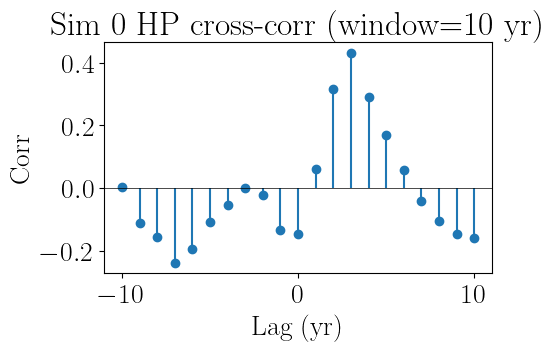

Sim 1: zero-lag HP‐corr = -0.283 (p=0.026)
      peak |corr| = -0.283 at lag = 0 yr


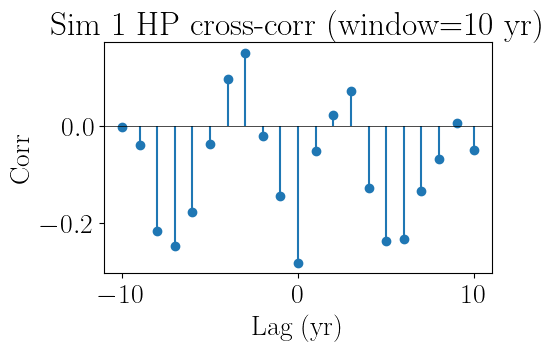

Sim 2: zero-lag HP‐corr = 0.201 (p=0.117)
      peak |corr| = 0.364 at lag = 2 yr


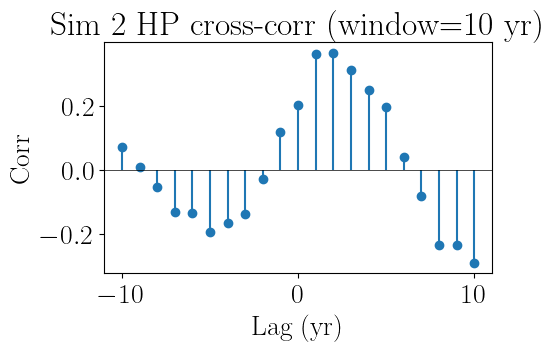

Sim 3: zero-lag HP‐corr = -0.186 (p=0.147)
      peak |corr| = 0.236 at lag = 9 yr


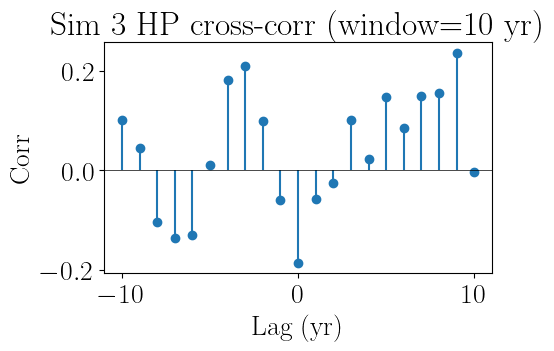

In [52]:
from scipy.stats import pearsonr
from scipy.signal import detrend

# parameters
window = 10  # years over which to compute the running mean

def highpass(arr, window):
    """
    Remove variability on time scales >= window by subtracting
    the centered running mean.
    """
    s = pd.Series(arr)
    trend = s.rolling(window=window, center=True, min_periods=1).mean()
    return (s - trend).values

n_sims = Drake.shape[0]
maxlag = 10
lags   = np.arange(-maxlag, maxlag+1)

for i in range(n_sims):
    # 1) form annual arrays
    r_i = r_annual[i, :]
    T_i = Drake   [i, :]

    # 2) high‐pass filter
    r_hp = highpass(r_i, window)
    T_hp = highpass(T_i, window)

    # 3) zero-lag correlation
    R, pR = pearsonr(r_hp, T_hp)
    print(f"Sim {i}: zero-lag HP‐corr = {R:.3f} (p={pR:.3f})")

    # 4) cross-correlation
    cc = []
    for lag in lags:
        if lag > 0:
            c = np.corrcoef(r_hp[:-lag], T_hp[lag:])[0,1]
        elif lag < 0:
            c = np.corrcoef(r_hp[-lag:], T_hp[:lag])[0,1]
        else:
            c = np.corrcoef(r_hp, T_hp)[0,1]
        cc.append(c)

    best = lags[np.nanargmax(np.abs(cc))]
    print(f"      peak |corr| = {cc[np.nanargmax(np.abs(cc))]:.3f} at lag = {best} yr")

    # 5) plot
    plt.figure(figsize=(5,3))
    plt.stem(lags, cc, basefmt=' ', use_line_collection=True)
    plt.title(f"Sim {i} HP cross-corr (window={window} yr)")
    plt.xlabel("Lag (yr)")
    plt.ylabel("Corr")
    plt.axhline(0, color='k', lw=0.5)
    plt.show()

In [44]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 5   # test up to 5-year memory
results = {}

for i in range(n_sims):
    r_i = highpass(r_annual[i], window=10)
    T_i = highpass(Drake[i],   window=10)

    df = pd.DataFrame({'T': T_i, 'r': r_i})

    print(f"\n=== Sim {i} Granger test of r → T ===")
    gc = grangercausalitytests(df[['T','r']],  
                              maxlag=maxlag, verbose=True)

    pvals = [ round(gc[lag][0]['ssr_ftest'][1],3) for lag in range(1, maxlag+1) ]
    print("r → T p-values by lag:", dict(zip(range(1,maxlag+1), pvals)))
    results[f"sim{i}"] = pvals


=== Sim 0 Granger test of r → T ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6647  , p=0.4182  , df_denom=58, df_num=1
ssr based chi2 test:   chi2=0.6991  , p=0.4031  , df=1
likelihood ratio test: chi2=0.6951  , p=0.4044  , df=1
parameter F test:         F=0.6647  , p=0.4182  , df_denom=58, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9142  , p=0.0257  , df_denom=55, df_num=2
ssr based chi2 test:   chi2=8.5400  , p=0.0140  , df=2
likelihood ratio test: chi2=7.9844  , p=0.0185  , df=2
parameter F test:         F=3.9142  , p=0.0257  , df_denom=55, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0546  , p=0.0364  , df_denom=52, df_num=3
ssr based chi2 test:   chi2=10.3975 , p=0.0155  , df=3
likelihood ratio test: chi2=9.5765  , p=0.0225  , df=3
parameter F test:         F=3.0546  , p=0.0364  , df_denom=52, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:

/glade/work/yhoussam/conda-envs/mom6_solutions/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/glade/work/yhoussam/conda-envs/mom6_solutions/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/glade/work/yhoussam/conda-envs/mom6_solutions/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/glade/work/yhoussam/conda-envs/mom6_solutions/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


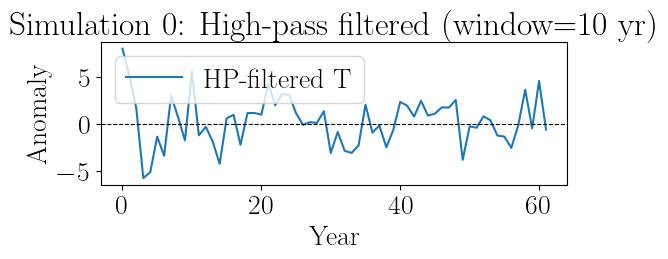

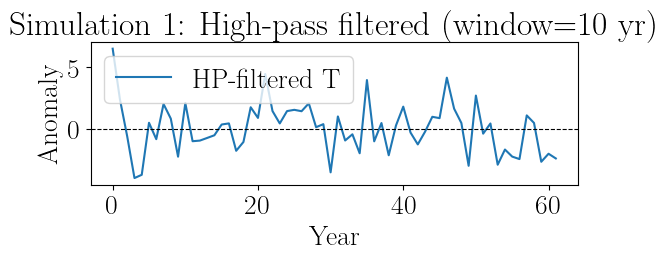

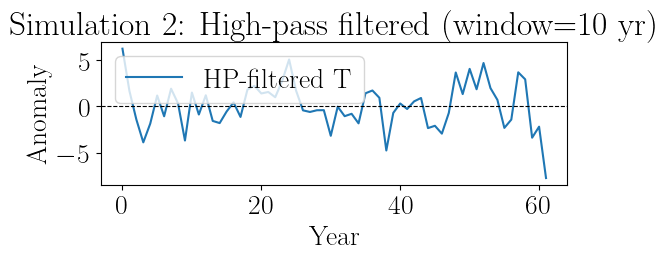

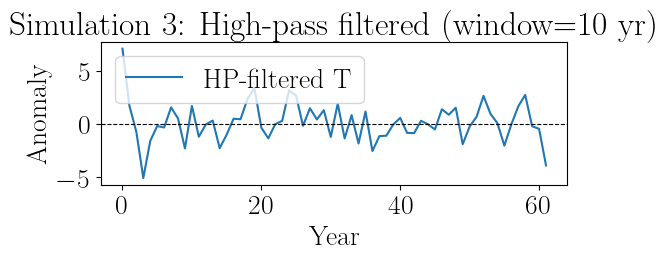

In [47]:
window = 10  # years for running‐mean removal
n_sims, n_years = r_annual.shape
years = np.arange(n_years)

for i in range(n_sims):
    #r_hp = highpass(r_annual[i, :], window)
    T_hp = highpass(Drake   [i, :], window)

    plt.figure(figsize=(6, 3))
    plt.plot(years, T_hp, label='HP-filtered T', linewidth=1.5)
    plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
    plt.title(f"Simulation {i}: High-pass filtered (window={window} yr)")
    plt.xlabel("Year")
    plt.ylabel("Anomaly")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

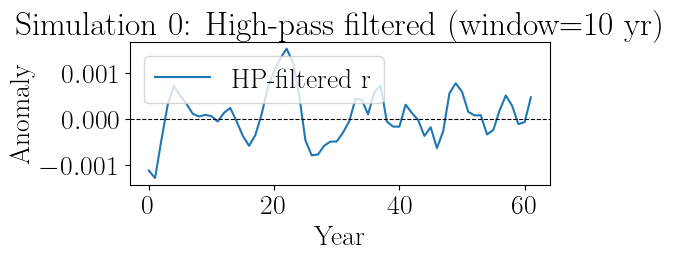

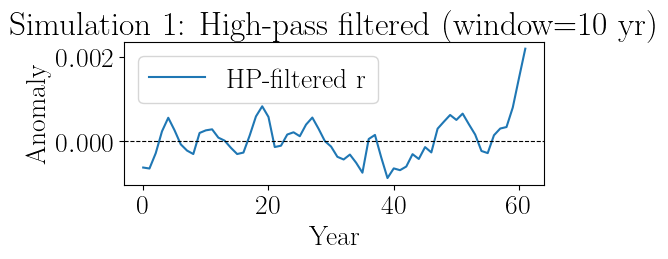

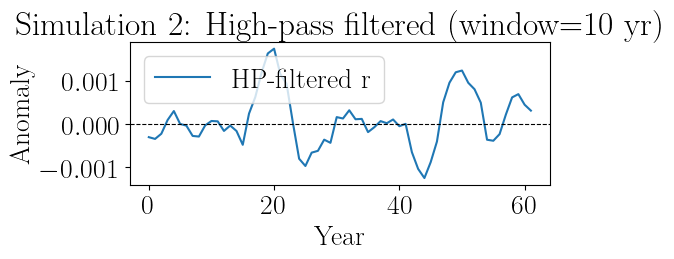

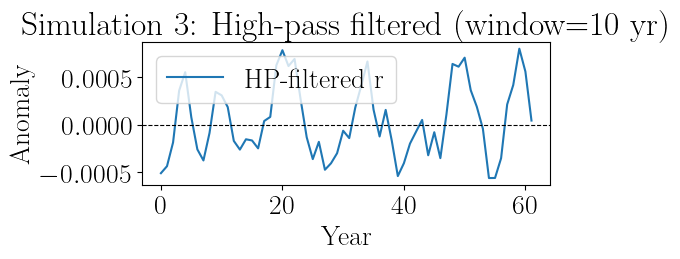

In [48]:
window = 10  # years for running‐mean removal
n_sims, n_years = r_annual.shape
years = np.arange(n_years)

for i in range(n_sims):
    r_hp = highpass(r_annual[i, :], window)
    #T_hp = highpass(Drake   [i, :], window)

    plt.figure(figsize=(6, 3))
    plt.plot(years, r_hp, label='HP-filtered r', linewidth=1.5)
    #plt.plot(years, T_hp, label='HP-filtered T', linewidth=1.5)
    plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
    plt.title(f"Simulation {i}: High-pass filtered (window={window} yr)")
    plt.xlabel("Year")
    plt.ylabel("Anomaly")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()